# Experiment: Varying N in top-N DDA fragmentation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import sys
from collections import defaultdict

In [3]:
sys.path.append('../codes')

In [4]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *
from VMSfunctions.Noise import *

### Useful functions

Performance is calculated by the proportion of original input peaks that got fragmented for varying values of `N` and `rt_tol`. More is better.

In [5]:
def find_chem(to_find, chem_list):
    for chem in chem_list:
        if chem.max_intensity == to_find.max_intensity and \
            chem.rt == to_find.rt and \
            chem.chromatogram == to_find.chromatogram:
            return chem
    return None

In [6]:
def count_fragmented(chem, fragmented_chems):
    peaks = fragmented_chems[chem]
    ms_counts = defaultdict(int)
    for p in peaks:
        ms_counts[p.ms_level] += 1
    return ms_counts

In [7]:
def get_total_peaks(controller, ms_level):
    num_peaks = [scan.num_peaks for scan in controller.scans[ms_level]]
    return sum(num_peaks)

def get_num_fragmented_chems(controller, dataset):
    fragmented_chems = controller.mass_spec.chemicals_to_peaks
    total = 0
    for i in range(len(dataset)):
        # if i % 1000 == 0:
        #     print(i, '/', len(dataset))
        chem = dataset[i]
        found = find_chem(chem, fragmented_chems)
        if found:
            ms_counts = count_fragmented(found, fragmented_chems)
            if ms_counts[2] > 0:
                total += 1
    prop = float(total) / len(dataset)
    return prop

def compute_performance(controller, dataset):
    total_ms2_peaks = get_total_peaks(controller, 2)
    props = get_num_fragmented_chems(controller, dataset)
    print('total_ms2_peaks %d props %.4f' % (total_ms2_peaks, props))    
    return total_ms2_peaks, props

In [8]:
def load_controller(N, rt_tol):
    analysis_name = 'experiment_N_%d_rttol_%d' % (N, rt_tol)    
    pickle_in = '%s/%s.p' % (results_dir, analysis_name) 
    print('Loading %s' % analysis_name)                    
    try:
        controller = load_obj(pickle_in)
    except FileNotFoundError:
        controller = None
    return controller

### Load experiment results

In [ ]:
results_dir = '../models/dda_results_2'

In [ ]:
dataset = load_obj('%s/dataset.p' % results_dir)

In [ ]:
Ns = range(1, 21, 1) # top-N DDA fragmentation
rt_tols = range(5, 31, 5) # the rt window around a selected precursor ion to prevent it from fragmented multiple times

### Compute performance

In [ ]:
N = 10
total_ms2_peaks_arr = []
props_arr = []
for rt_tol in rt_tols:
    controller = load_controller(N, rt_tol)
    if controller is not None:
        total_ms2_peaks, props = compute_performance(controller, dataset)
    else:
        total_ms2_peaks = 0
        props = 0
    total_ms2_peaks_arr.append(total_ms2_peaks)
    props_arr.append(props)

Loading experiment_N_10_rttol_5
total_ms2_peaks 94773 props 0.1281
Loading experiment_N_10_rttol_10
total_ms2_peaks 62345 props 0.1213
Loading experiment_N_10_rttol_15
total_ms2_peaks 51014 props 0.1126
Loading experiment_N_10_rttol_20
total_ms2_peaks 46469 props 0.1047
Loading experiment_N_10_rttol_25
total_ms2_peaks 41753 props 0.0972
Loading experiment_N_10_rttol_30
total_ms2_peaks 39848 props 0.0936


In [ ]:
%matplotlib inline

Total ms2 peaks for N = 10 and varying rt_tols

Text(0.5, 1.0, 'N=10')

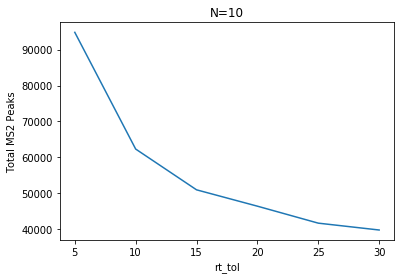

In [ ]:
plt.plot(rt_tols, total_ms2_peaks_arr)
plt.xlabel('rt_tol')
plt.ylabel('Total MS2 Peaks')
plt.title('N=%d' % N)

Proportion of the input ms1 peaks that got fragmented for N = 10 and varying rt_tols

Text(0.5, 1.0, 'N=10')

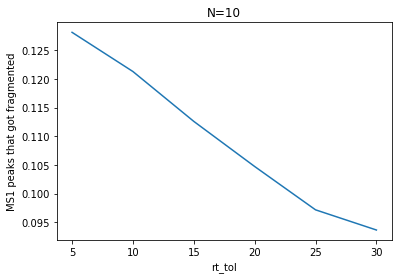

In [ ]:
plt.plot(rt_tols, props_arr)
plt.xlabel('rt_tol')
plt.ylabel('MS1 peaks that got fragmented')
plt.title('N=%d' % N)

In [ ]:
rt_tol = 5
total_ms2_peaks_arr = []
props_arr = []
for N in Ns:
    controller = load_controller(N, rt_tol)
    if controller is not None:
        total_ms2_peaks, props = compute_performance(controller, dataset)
    else:
        total_ms2_peaks = 0
        props = 0
    total_ms2_peaks_arr.append(total_ms2_peaks)
    props_arr.append(props)

Loading experiment_N_1_rttol_5
total_ms2_peaks 19787 props 0.0241
Loading experiment_N_2_rttol_5
total_ms2_peaks 31286 props 0.0396
Loading experiment_N_3_rttol_5
total_ms2_peaks 40617 props 0.0555
Loading experiment_N_4_rttol_5
total_ms2_peaks 48805 props 0.0686
Loading experiment_N_5_rttol_5
total_ms2_peaks 57503 props 0.0814
Loading experiment_N_6_rttol_5
total_ms2_peaks 66223 props 0.0927
Loading experiment_N_7_rttol_5
total_ms2_peaks 74101 props 0.1024
Loading experiment_N_8_rttol_5
total_ms2_peaks 81819 props 0.1125
Loading experiment_N_9_rttol_5
total_ms2_peaks 88671 props 0.1209
Loading experiment_N_10_rttol_5
total_ms2_peaks 94773 props 0.1281
Loading experiment_N_11_rttol_5
total_ms2_peaks 105394 props 0.1366
Loading experiment_N_12_rttol_5
total_ms2_peaks 111135 props 0.1451
Loading experiment_N_13_rttol_5
total_ms2_peaks 117476 props 0.1529
Loading experiment_N_14_rttol_5
total_ms2_peaks 122955 props 0.1610
Loading experiment_N_15_rttol_5
total_ms2_peaks 127139 props 0.1673

Total ms2 peaks for rt_tol = 5 and varying Ns

Text(0.5, 1.0, 'rt_tol=5')

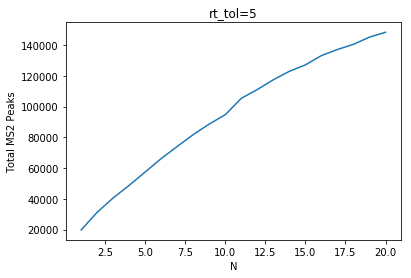

In [ ]:
plt.plot(Ns, total_ms2_peaks_arr)
plt.xlabel('N')
plt.ylabel('Total MS2 Peaks')
plt.title('rt_tol=5')

Proportion of the input ms1 peaks that got fragmented for rt_tol = 5 and varying Ns

Text(0.5, 1.0, 'rt_tol=5')

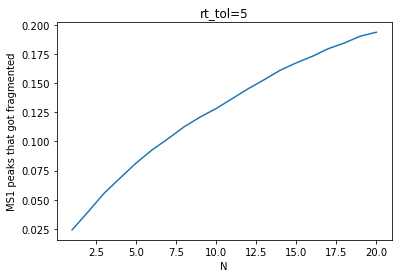

In [ ]:
plt.plot(Ns, props_arr)
plt.xlabel('N')
plt.ylabel('MS1 peaks that got fragmented')
plt.title('rt_tol=5')

### Compute performance for varying Ns and rt_tols

In [ ]:
X, Y = np.meshgrid(Ns, rt_tols)
Z_total_ms2_peaks = np.zeros_like(X)
Z_num_fragmented_chems = np.zeros_like(X).astype(float)

In [ ]:
for j in range(X.shape[1]):
    for i in range(X.shape[0]):    
        if Z_total_ms2_peaks[i, j] == 0:
            N = X[i, j]
            rt_tol = Y[i, j]            
            analysis_name = 'experiment_N_%d_rttol_%d' % (N, rt_tol)    
            pickle_in = '%s/%s.p' % (results_dir, analysis_name) 

            print('Loading %s' % analysis_name)                    
            try:
                controller = load_obj(pickle_in)
            except FileNotFoundError:
                controller = None

            # compute performance
            if controller is not None:
                total_ms2_peaks, props = compute_performance(controller, dataset)
                Z_total_ms2_peaks[i, j] = total_ms2_peaks
                Z_num_fragmented_chems[i, j] = props

Loading experiment_N_1_rttol_5
total_ms2_peaks 19787 props 0.0241
Loading experiment_N_1_rttol_10
total_ms2_peaks 12377 props 0.0224
Loading experiment_N_1_rttol_15
total_ms2_peaks 10690 props 0.0218
Loading experiment_N_1_rttol_20
total_ms2_peaks 9835 props 0.0203
Loading experiment_N_1_rttol_25
total_ms2_peaks 8651 props 0.0202
Loading experiment_N_1_rttol_30
total_ms2_peaks 8286 props 0.0192
Loading experiment_N_2_rttol_5
total_ms2_peaks 31286 props 0.0396
Loading experiment_N_2_rttol_10
total_ms2_peaks 19337 props 0.0372
Loading experiment_N_2_rttol_15
total_ms2_peaks 16589 props 0.0352
Loading experiment_N_2_rttol_20
total_ms2_peaks 14566 props 0.0336
Loading experiment_N_2_rttol_25
total_ms2_peaks 13181 props 0.0317
Loading experiment_N_2_rttol_30
total_ms2_peaks 12424 props 0.0307
Loading experiment_N_3_rttol_5
total_ms2_peaks 40617 props 0.0555
Loading experiment_N_3_rttol_10
total_ms2_peaks 26369 props 0.0518
Loading experiment_N_3_rttol_15
total_ms2_peaks 21741 props 0.0480
L

### Make plot

In [ ]:
def make_plot(X, Y, Z):
    # Plot the surface.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    # ax.set_zlim(-1.01, 1.01)
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

In [ ]:
%matplotlib notebook

In [ ]:
make_plot(X, Y, Z_total_ms2_peaks)

In [ ]:
make_plot(X, Y, Z_num_fragmented_chems)

In [ ]:
# %matplotlib inline

In [ ]:
# make_plot(X, Y, Z_total_ms2_peaks)

In [ ]:
# make_plot(X, Y, Z_num_fragmented_chems)